<a href="https://colab.research.google.com/github/pallavi-allada/experiments-with-data/blob/master/Image_Classification_Pretrained_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import random
import os

IMG_FILE_DIR = '/content/drive/My Drive/Colab Notebooks/ObjectDetection/images/classification files/tufted_headboards'
file = random.choice(os.listdir(IMG_FILE_DIR))

Read image using OpenCV/PIL - 
1) the image is read in BGR format in OpenCV, where as it is in RGB format if using the PIL library.
2) OpenCV imread() returns an ndarray, whereas PIL open() returns a JpegImageFile object.
3) OpenCV reads images as HxWxC, whereas PIL reads images as WxHxC
4) Unless we convert the color format, we cannot use the functions interchangeably i.e we cannot open an image in OpenCV and then use the PIL functions on them further and vice versa. Instead convert to the other format before using any specific functions from the other library.

In [12]:
import cv2
img = cv2.imread(os.path.join(IMG_FILE_DIR, file))
type(img)
img.shape

(420, 800, 3)

In [13]:
from PIL import Image
img = Image.open(os.path.join(IMG_FILE_DIR, file))
type(img)
width,height = img.size
img.size

(800, 420)

In [14]:
#To convert PIL img to ndarray same as in OpenCV format of HxWxC
import numpy as np
np.array(img).shape

(420, 800, 3)

Nevertheless, I prefer using OpenCV to PIL as it is more cryptic. But, since Keras uses PIL format, let us convert to RGB format from Open CV's BGR format.

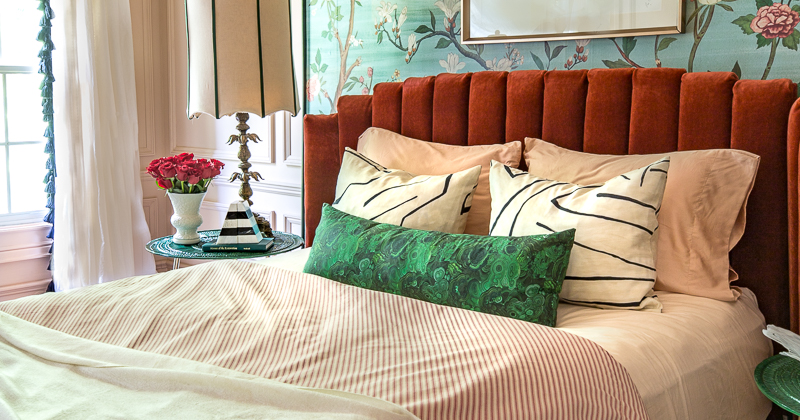

In [24]:
import cv2
img = cv2.imread(os.path.join(IMG_FILE_DIR,file))

#Use imshow() to display image but it causes sessions to crash in Colab hence using cv2_imshow from google.colab.patches
#cv2.imshow(img)
from google.colab.patches import cv2_imshow
cv2_imshow(img)

Since the models expect inputs in 4 dimensions as BxHxWxC, we need to add an extra dimension. We will use numpy for this, as we have a numpy ndarray after imread()


In [32]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(224,224))
img_batch = np.expand_dims(img,axis=0)
img_batch.shape

(1, 224, 224, 3)

We need to normalize the image using Imagenet statistics as the train images of the pretrained model were normalized too.

In [0]:
import keras
from keras.applications import resnet50
img_pprocess = resnet50.preprocess_input(img_batch)

#Download the resnet50 model
resnet50_model = resnet50.ResNet50(weights='imagenet')

In [47]:
from keras.applications.imagenet_utils import decode_predictions
predictions = resnet50_model.predict(img_pprocess)
label = decode_predictions(predictions)
print(label)
# predictions = predictions[0]
# preds = predictions[np.argmax(predictions)]
# print(preds)

[[('n03388549', 'four-poster', 0.45891634), ('n04344873', 'studio_couch', 0.32343653), ('n04033995', 'quilt', 0.12890568), ('n03938244', 'pillow', 0.041192483), ('n04590129', 'window_shade', 0.025659256)]]
